# Topic Extraction from Musk's Tweets


## Data

Tweets collected on a daily bases from Sep 2021, available from Kaggle. Download and extract by:
* `kaggle datasets download -d zjjc123/elon-musk-tweets-dataset -p data`
* `unzip data/elon-musk-tweets-dataset.zip -d data/`

In [352]:
import pandas as pd
df = pd.read_csv('data/tweets.csv')
corpus = df['Text']

#  Analysis

6 topics are extracted using Latent Dirichlet Allocation, and visualized by wordclouds of top words per topic.

In [349]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

N_TOPICS = 6

model = Pipeline([
    ('vec', CountVectorizer(max_df=0.50, min_df=10, stop_words="english")),
    ('lda', LatentDirichletAllocation(n_components=N_TOPICS,max_iter=50))
])

model.fit(corpus)

Pipeline(steps=[('vec',
                 CountVectorizer(max_df=0.5, min_df=10, stop_words='english')),
                ('lda',
                 LatentDirichletAllocation(max_iter=50, n_components=6))])

In [350]:
N_TOP_WORDS = 15
vec = model.named_steps.get('vec')
lda = model.named_steps.get('lda')
words = vec.get_feature_names_out()
top_words_idx = lda.components_.argsort(-1)[:,-N_TOP_WORDS:]
top_words = words[top_words_idx]

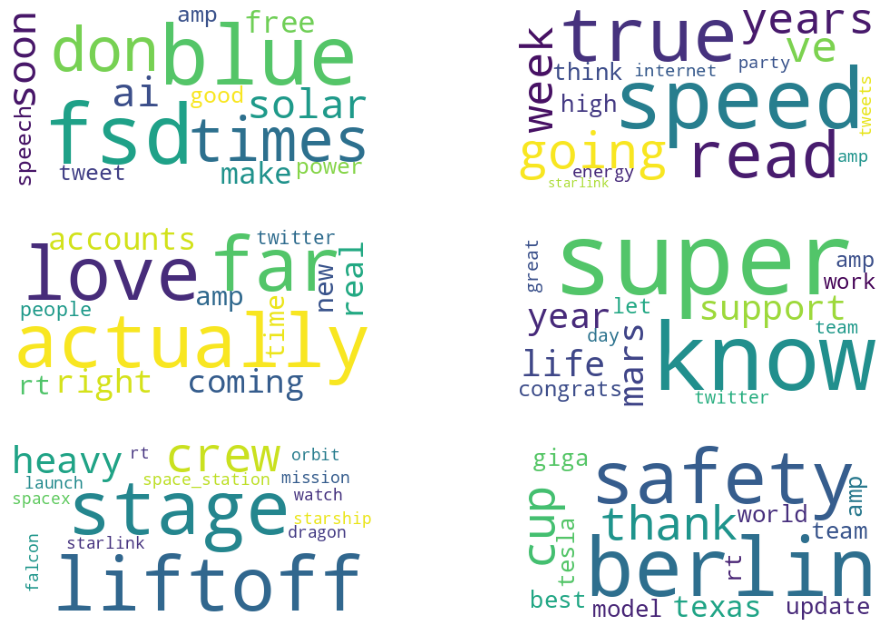

In [314]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_args = {'background_color':'white'}
imshow_args = {}

fig, axs = plt.subplots(3,2,figsize=(12,8))
for ax,words in zip(axs[:N_TOPICS].flatten(),top_words):
    cloud_data = WordCloud(**wordcloud_args).generate(','.join(words))
    ax.imshow(cloud_data)
    ax.set_axis_off()
plt.show()